## **Import Required Libraries**

In [ ]:
try:
    import sys,os
    import tensorflow as tf
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    print("----Libraries Loaded----")
except:
    print("----Libraries Not Loaded----")

----Libraries Loaded----


## **Loading, Reading, and Pre-Processing Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir("/content/drive/My Drive/Projects/Orange-Fruit-Recognition-Using-Image-Segmentation")

In [ ]:
os.listdir()

['Binary classification',
 'requirements.txt',
 'README.md',
 '.git',
 'Image_Segmentaion',
 'build_model.py']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1.0 / 255, 
        rotation_range=30,  
        zoom_range = 0.15,  
        width_shift_range=0.10,  
        height_shift_range=0.10,  
        horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    '/content/drive/My Drive/Projects/Orange-Fruit-Recognition-Using-Image-Segmentation/Binary classification/Dataset/train',
    target_size=(64,64),
    batch_size=10,
    class_mode='binary')

val_set = val_datagen.flow_from_directory(
    '/content/drive/My Drive/Projects/Orange-Fruit-Recognition-Using-Image-Segmentation/Binary classification/Dataset/validation',
    target_size=(64,64),
    batch_size=10,
    class_mode='binary')

Found 1062 images belonging to 2 classes.
Found 526 images belonging to 2 classes.


## **Building Model**

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy  
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2 
from keras.utils import np_utils


def classifier_model():
    
    # initializing the sequential model
    model = Sequential()

    # adding first bolck of the model
    
    model.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation = 'relu' , kernel_initializer='random_normal'))
    model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'random_normal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    # adding second block of the model
    model.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer = 'random_normal'))
    model.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer = 'random_normal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    # adding third layer of the model
    model.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer = 'random_normal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    # Flattening the model
    model.add(Flatten())

    # adding the Dense layers
    model.add(Dense(256, activation='relu' , kernel_initializer='random_normal'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu' , kernel_initializer='random_normal'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    # adding the output layer
    model.add(Dense(1, activation='sigmoid' , kernel_initializer='random_normal'))

    # model compilation + optimizer and loss function specifications.
    # opt = keras.optimizers.Adam(learning_rate=0.01)

    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

    return model


model = classifier_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 60, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        3

**Compiling and Training Model**

In [ ]:
with tf.device('/GPU:0'):
    history = model.fit(
        training_set,
        steps_per_epoch=1062//20,
        epochs=200, 
        verbose=1,
        validation_data = val_set,
        validation_steps=526//20
        #callbacks=[callback]
    )

Epoch 1/200
53/53 [==============================] - 527s 10s/step - loss: 0.4360 - accuracy: 0.8132 - val_loss: 0.7159 - val_accuracy: 0.4462
Epoch 2/200
53/53 [==============================] - 254s 5s/step - loss: 0.3093 - accuracy: 0.8640 - val_loss: 0.8191 - val_accuracy: 0.5269
Epoch 3/200
53/53 [==============================] - 125s 2s/step - loss: 0.2280 - accuracy: 0.9151 - val_loss: 1.1390 - val_accuracy: 0.5038
Epoch 4/200
53/53 [==============================] - ETA: 0s - loss: 0.2771 - accuracy: 0.8851

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


53/53 [==============================] - 66s 1s/step - loss: 0.2771 - accuracy: 0.8851 - val_loss: 0.5517 - val_accuracy: 0.5115
Epoch 5/200
53/53 [==============================] - 29s 563ms/step - loss: 0.2878 - accuracy: 0.9061 - val_loss: 0.9549 - val_accuracy: 0.4808
Epoch 6/200
53/53 [==============================] - 25s 471ms/step - loss: 0.2541 - accuracy: 0.9019 - val_loss: 0.1983 - val_accuracy: 0.9423
Epoch 7/200
53/53 [==============================] - 9s 176ms/step - loss: 0.2651 - accuracy: 0.9157 - val_loss: 1.0051 - val_accuracy: 0.5308
Epoch 8/200
53/53 [==============================] - 11s 203ms/step - loss: 0.2238 - accuracy: 0.9245 - val_loss: 0.8722 - val_accuracy: 0.5154
Epoch 9/200
53/53 [==============================] - 9s 177ms/step - loss: 0.2130 - accuracy: 0.9253 - val_loss: 0.1511 - val_accuracy: 0.9462
Epoch 10/200
53/53 [==============================] - 7s 134ms/step - loss: 0.2153 - accuracy: 0.9157 - val_loss: 0.6782 - val_accuracy: 0.8154
Epoch 11/

**Ploting Results**

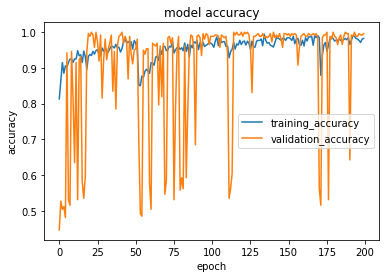

In [ ]:
plt.plot(history.history['accuracy'][0:220])
plt.plot(history.history['val_accuracy'][0:220])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.show()

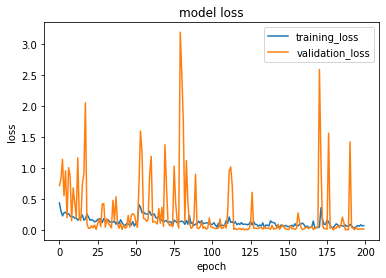

In [ ]:
plt.plot(history.history['loss'][0:220])
plt.plot(history.history['val_loss'][0:220])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'])
plt.show()

**Save Model**

In [ ]:
m_json = model.to_json()  
with open("model2.json", "w") as json_file:  
    json_file.write(m_json)  
model.save_weights("Orange_Fruit_Weights2.h5") 

## **Loading and Testing Model**

In [ ]:
from tensorflow.keras.models import load_model
from keras.models import model_from_json
from tensorflow.keras.preprocessing.image import load_img, img_to_array

model = model_from_json(open("Binary classification/model2.json", "r").read())  
model.load_weights('Binary classification/Orange_Fruit_Weights2.h5')


In [ ]:
os.listdir('Binary classification')


['Orange_Fruit_Part1.ipynb',
 'README.md',
 'Orange_Fruit_Weights2.h5',
 'build_model.py',
 'model2.json',
 'Dataset',
 'Images',
 '__pycache__']

## **Loading Image For Prediction**

In [ ]:
def process_image(path):
  img = load_img(path, target_size = (64,64))
  img_tensor = img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis = 0)
  img_tensor/=255.0
  return img_tensor

path1 = 'Binary classification/Images/Orange.jpg'
img_original1 = load_img(path1)

## **Predicting**

In [ ]:
orange=[]

pred1 = model.predict(process_image(path1))
print("Pred1 = ",pred1)


Pred1 =  [[0.9989064]]


## **Showing Prediction Results**

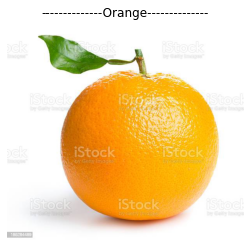

In [ ]:
def show(pred,img):

  if pred>0.5: str = '--------------Orange--------------'
  else: str = '--------------Not Orange--------------'

  plt.imshow(img)
  plt.axis('off')
  plt.title(str)
  plt.show()

show(pred1,img_original1)
#show(pred2,img_original2)

## **IMAGE SEGMENTATION**

In [ ]:
%matplotlib inline
import cv2
import sys,os
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
from __future__ import division

In [ ]:
def show(image):
    # Figure size in inches
    plt.figure(figsize=(5, 5))
    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')
    
def show_mask(mask):
    plt.figure(figsize=(5, 5))
    plt.imshow(mask, cmap='gray')

In [ ]:
def find_biggest_contour(image):
    image = image.copy()
    contours, _= cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    biggest_contour=0
    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    if(contour_sizes):
        a=[True]
        biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
        mask = np.zeros(image.shape, np.uint8)
        cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
        return a, biggest_contour, mask
    else:
        a=[False]
        return a, biggest_contour, image

In [ ]:
def overlay_mask(mask, image):
    # make the mask rgb
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    # calculates the weighted sum of two arrays
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    #show(img)

In [ ]:
def segmentation(image):
  max_dimension = max(image.shape)
  scale = 700/max_dimension
  image = cv2.resize(image, None, fx=scale, fy=scale)
  
  #Convert BGR color space to RGB
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #print("Input Image:")
  show(image)

  images = []
  for i in [0, 1, 2]:
    colour = image.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 0
    if i != 2: colour[:,:,2] = 0
    images.append(colour)
    
  #show(np.vstack(images))

  #To eliminate noise and for clean smooth colors in image.
  #Blur the image 
  image_blur = cv2.GaussianBlur(image, (7, 7), 0)
  #show(image_blur)  

  #To focus on color conert it itno HSV space. 
  image_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)
  #show(image_hsv)


  '''h, s, v = cv2.split(image_hsv)
  fig = plt.figure()
  axis = fig.add_subplot(1, 1, 1, projection="3d")
  pixel_colors = image.reshape((np.shape(image)[0]*np.shape(image)[1], 3))
  norm = colors.Normalize(vmin=-1.,vmax=1.)
  norm.autoscale(pixel_colors)
  pixel_colors = norm(pixel_colors).tolist()
  axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
  axis.set_xlabel("Hue")
  axis.set_ylabel("Saturation")
  axis.set_zlabel("Value")
  #plt.show()'''

  # Filter by colour
  # 10-25 hue
  #minimum orange amount, max orange amount
  min_orange = np.array([10, 100, 20])
  max_orange = np.array([25, 255, 255])
  
  #layer
  mask1 = cv2.inRange(image_hsv, min_orange, max_orange)

  #birghtness of a color is hue
  # 170-180 hue
  min_orange2 = np.array([180, 100, 20])
  max_orange2 = np.array([195, 255, 255])
  mask2 = cv2.inRange(image_hsv, min_orange2, max_orange2)

  #mask capturing the orange amount
  mask = mask1 + mask2
  #print("\nSegmented Image by Color Based Detection:")
  show(mask)

  #Edge Detection using Canny
  edge=cv2.Canny(mask,50,50)
  #print("\nSegmented Image by EDGE Based Detection:")
  show(edge)

  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
  # Fill small gaps
  #erosion followed by dilation
  mask_closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
  
  #It is useful in removing noise
  #Dilation followed by Erosion.
  mask_clean = cv2.morphologyEx(mask_closed, cv2.MORPH_OPEN, kernel)

  a,big_orange_contour, mask_orange = find_biggest_contour(mask_clean)

  overlay = overlay_mask(mask, image) 
  
  image_with_ellipse = image.copy()
  if(any(a)):
    # Bounding ellipse
    ellipse = cv2.fitEllipse(big_orange_contour)
    cv2.ellipse(image_with_ellipse, ellipse, (0,0,0), 4)
    print("Orange Found :>")
    show(image_with_ellipse)
  else:
    print("Orange Not Found :<")
    show(image)

## **Showing Segmented Image**

Shape: (563, 612, 3)
Orange Found :>


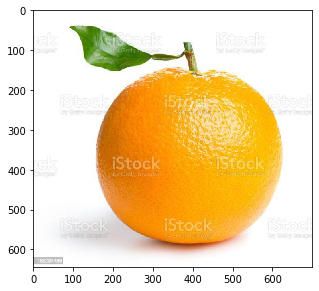

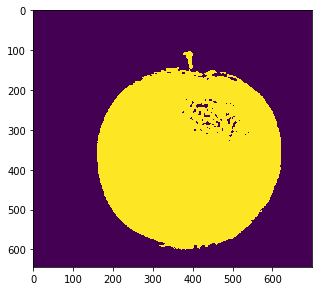

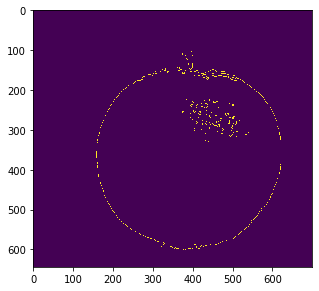

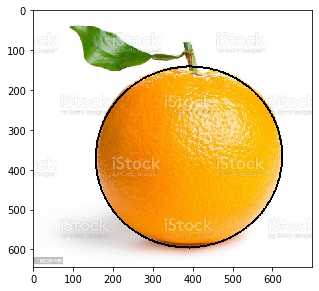

In [ ]:
if pred1>0.5:
  image = cv2.imread("Binary classification/Images/Orange.jpg")
  print("Shape: {}".format(image.shape))
  segmentation(image)
else:
  print("Orange Not Found")
  show(image)